In [2]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Read the csv file into a pandas DataFrame

fla = pd.read_csv('Florida.csv')
print(fla)

                             BorrName                     BorrStreet  \
0      Superior Power Solutions, Inc.      6601 Memorial Hwy ste 109   
1                 MAXI'S SHUTTLE, LLC              10996 NW 58TH TER   
2      PJ BRADFORD RESTAURANT GROUP L        5414 DEEP LAKE RD #1152   
3           Infinity Woodworks, Corp.                 3884 NW 2ND ST   
4          The White Dress Bridal Inc            11036 MERIDIAN DR N   
5               E S TEXTILE CARE, LLC               4865 SW 147th CT   
6                MARK L FORNARIS, PA.                 20532 NW 12 St   
7      New Vision Construction & Desi             8650 SW 57th Manor   
8                        BIAMAX, INC.                12558 80th Ln N   
9        C. Everett Enterprises, Inc.             4594 THORNWOOD CIR   
10                      MC Signs, LLC               746 S 3rd Street   
11        Power Tech Electronics Inc.          2555-A NW 107 Avenue.   
12                       Songchai LLC      951 Brickell Ave Ste 

In [30]:
fla = fla.dropna()

In [4]:
# X = ill[["GrossApproval", "SBAGuaranteedApproval", "ApprovalFiscalYear", "InitialInterestRate", "TermInMonths"]]
# y = ill["LoanStatus"].values.reshape(-1, 1)
# print(X.shape, y.shape)

In [5]:
X = fla[["TermInMonths" ]]
y = fla["Status"].values.reshape(-1, 1)
print(X.shape, y.shape)

(572, 1) (572, 1)


In [14]:
X = fla[["TermInMonths" ]]
y = fla["RevolverStatus"].values.reshape(-1, 1)
print(X.shape, y.shape)

(572, 1) (572, 1)


In [16]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["TermInMonths"])
data_binary_encoded.head()

,TermInMonths_0,TermInMonths_1,TermInMonths_2,TermInMonths_3,TermInMonths_4,TermInMonths_6,TermInMonths_7,TermInMonths_8,TermInMonths_9,TermInMonths_10,...,TermInMonths_220,TermInMonths_223,TermInMonths_251,TermInMonths_266,TermInMonths_268,TermInMonths_270,TermInMonths_274,TermInMonths_278,TermInMonths_281,TermInMonths_291
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
fla.corr()

,BorrZip,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,Status,GrossChargeOffAmount,RevolverStatus,JobsSupported
BorrZip,1.000000,-0.061492,0.028343,0.037495,-0.036561,-0.064014,-0.016419,-0.002532,NaN,0.004905,0.043256,-0.015883
BankZip,-0.061492,1.000000,-0.262907,-0.245856,-0.161429,0.235020,0.101371,-0.009542,NaN,-0.254682,-0.390921,-0.096509
GrossApproval,0.028343,-0.262907,1.000000,0.993216,-0.016947,-0.412060,0.438794,0.036483,NaN,0.896826,-0.199863,0.311188
SBAGuaranteedApproval,0.037495,-0.245856,0.993216,1.000000,-0.038144,-0.405968,0.465896,0.039804,NaN,0.886781,-0.228414,0.308474
ApprovalFiscalYear,-0.036561,-0.161429,-0.016947,-0.038144,1.000000,-0.170237,0.076326,0.118485,NaN,0.023471,0.101937,-0.003307
InitialInterestRate,-0.064014,0.235020,-0.412060,-0.405968,-0.170237,1.000000,-0.209366,-0.082563,NaN,-0.382502,0.224815,-0.167831
TermInMonths,-0.016419,0.101371,0.438794,0.465896,0.076326,-0.209366,1.000000,0.105609,NaN,0.339018,-0.382962,0.059280
NaicsCode,-0.002532,-0.009542,0.036483,0.039804,0.118485,-0.082563,0.105609,1.000000,NaN,0.057958,-0.151383,0.063412
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrossChargeOffAmount,0.004905,-0.254682,0.896826,0.886781,0.023471,-0.382502,0.339018,0.057958,NaN,1.000000,-0.176688,0.291542


In [24]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

X_train.head()

,TermInMonths
130,38
154,41
180,8
266,37
230,36


In [25]:
y_train

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [26]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [27]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [28]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["TermInMonths"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["TermInMonths"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

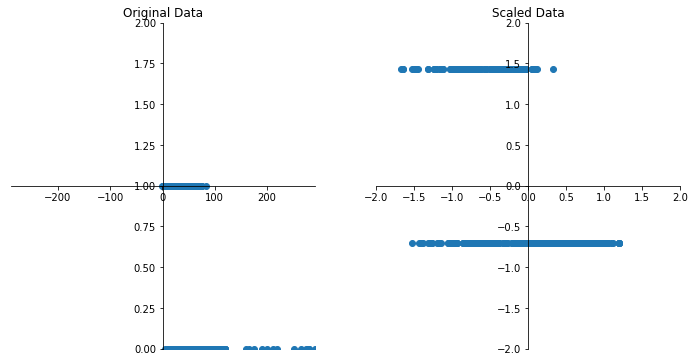

In [29]:
plt.show()